In [13]:
import json
import os
import matplotlib.pyplot as plt

## Open files

In [14]:
PATH = "./out_dep_1"
FILE_COUNT = 600

def load_raw_data():
    out = {}
    out[PATH] = []
    for i in range(FILE_COUNT):
        file_name = f"{PATH}/{i}.json"
        with open(file_name) as file:
            j = json.load(file)
            out[PATH].append(j["items"])
    return out

In [15]:
def extract_podscale_data(podscales_list:dict):
    def read_podscale(podscale:dict):
        spec = podscale["spec"]
        status = podscale["status"]
        pod = spec["pod"]
        desired = spec["desired"]["cpu"].strip("m")
        actual = status["actual"]["cpu"].strip("m")
        capped = status["capped"]["cpu"].strip("m")
        return (pod, int(desired), int(actual), int(capped))
    return [[read_podscale(p) for p in podscales] for podscales in podscales_list]

In [16]:
def track_podscales(podscale_data:list):
    res = dict()
    for ts, podscales in enumerate(podscale_data):
        time = ts + 1
        for podscale, desired, actual, capped in podscales:
            if podscale not in res:
                res[podscale] = dict()
                res[podscale]["born_at"] = time
                res[podscale]["last_alive_at"] = time
                res[podscale]["data"] = [(0,0,0) for _ in range(time)]
            res[podscale]["last_alive_at"] = time
            res[podscale]["data"].append((desired, actual, capped))
    return res

# Analysis

In [20]:
raw_data = load_raw_data()
dep_raw= raw_data[PATH] # raw podscales for all timestamps
dep_pods = extract_podscale_data(dep_raw) # (podscale, des, act, cap) for all timestamps (these are basically the same data)
podscales = track_podscales(dep_pods)

In [22]:
for k, v in podscales.items():
    print(k, "born at:", v["born_at"],"last alive at:", v["last_alive_at"])

crime-numbers-ta6m2zcv born at: 1 last alive at: 600
grime-numbers-xshy3plm born at: 1 last alive at: 600
prime-numbers-callee-sequential-6drxckn5 born at: 1 last alive at: 295
prime-numbers-callee-sequential-kmhlnmdb born at: 1 last alive at: 600
prime-numbers-caller-sequential-3gb61anx born at: 1 last alive at: 600
prime-numbers-caller-sequential-nodep-h4x0kceg born at: 1 last alive at: 600
prime-numbers-ieyoh54e born at: 1 last alive at: 600


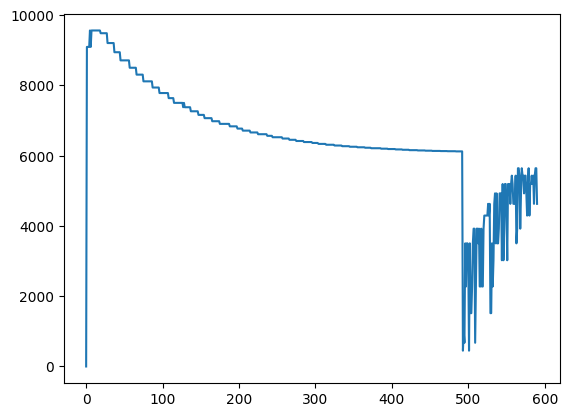

In [23]:
plt.plot([podscale[2] for podscale in podscales["prime-numbers-callee-sequential-kmhlnmdb"]["data"]])

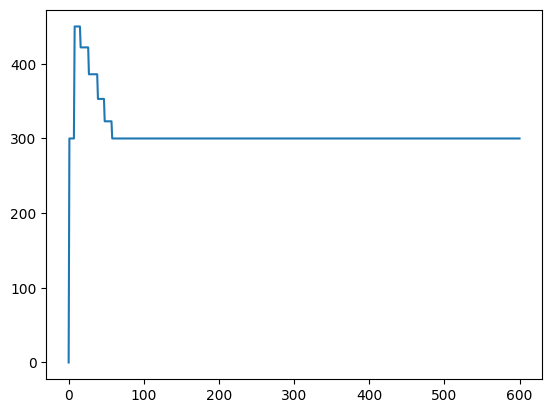

In [24]:
plt.plot([podscale[2] for podscale in podscales["prime-numbers-caller-sequential-3gb61anx"]["data"]])


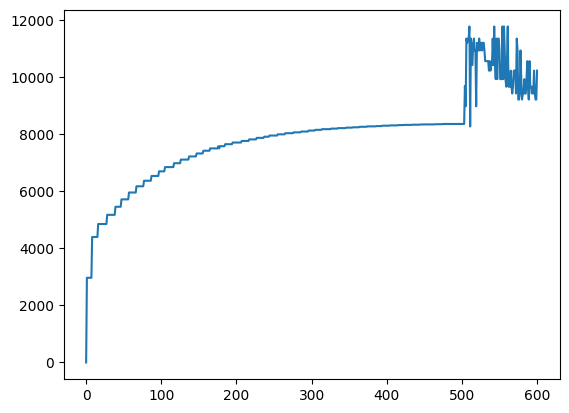

In [25]:
plt.plot([podscale[2] for podscale in podscales["prime-numbers-caller-sequential-nodep-h4x0kceg"]["data"]])


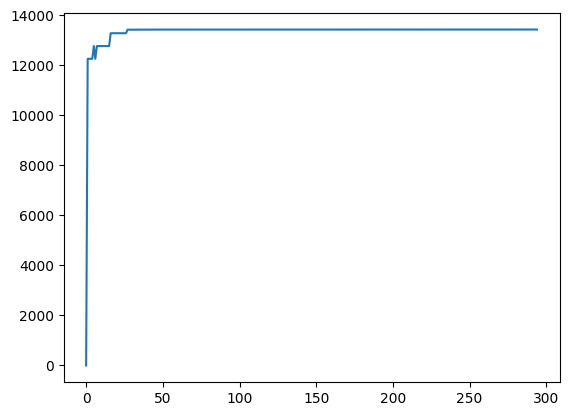

In [26]:
plt.plot([podscale[2] for podscale in podscales["prime-numbers-callee-sequential-6drxckn5"]["data"]])
